In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.arima_model import ARIMA

In [2]:
from prophet import Prophet

file_path = "market-price.csv"

bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

16:26:55 - cmdstanpy - INFO - Chain [1] start processing
16:26:56 - cmdstanpy - INFO - Chain [1] done processing


In [3]:
# 5일을 내다보며 예측합니다.
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
365,2018-08-27,6900.528001,6247.317753,7548.856563
366,2018-08-28,6993.503565,6327.597808,7731.353971
367,2018-08-29,7001.856801,6309.093881,7682.121499
368,2018-08-30,7070.513321,6396.051798,7803.968742
369,2018-08-31,7147.085368,6383.028640,7945.473375


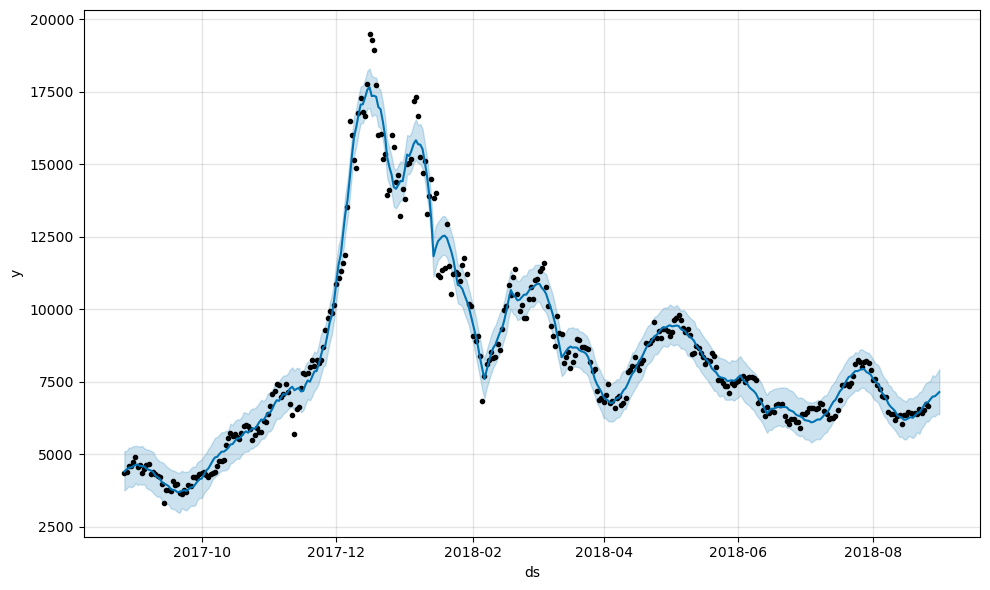

In [4]:
fig1 = prophet.plot(forecast_data)

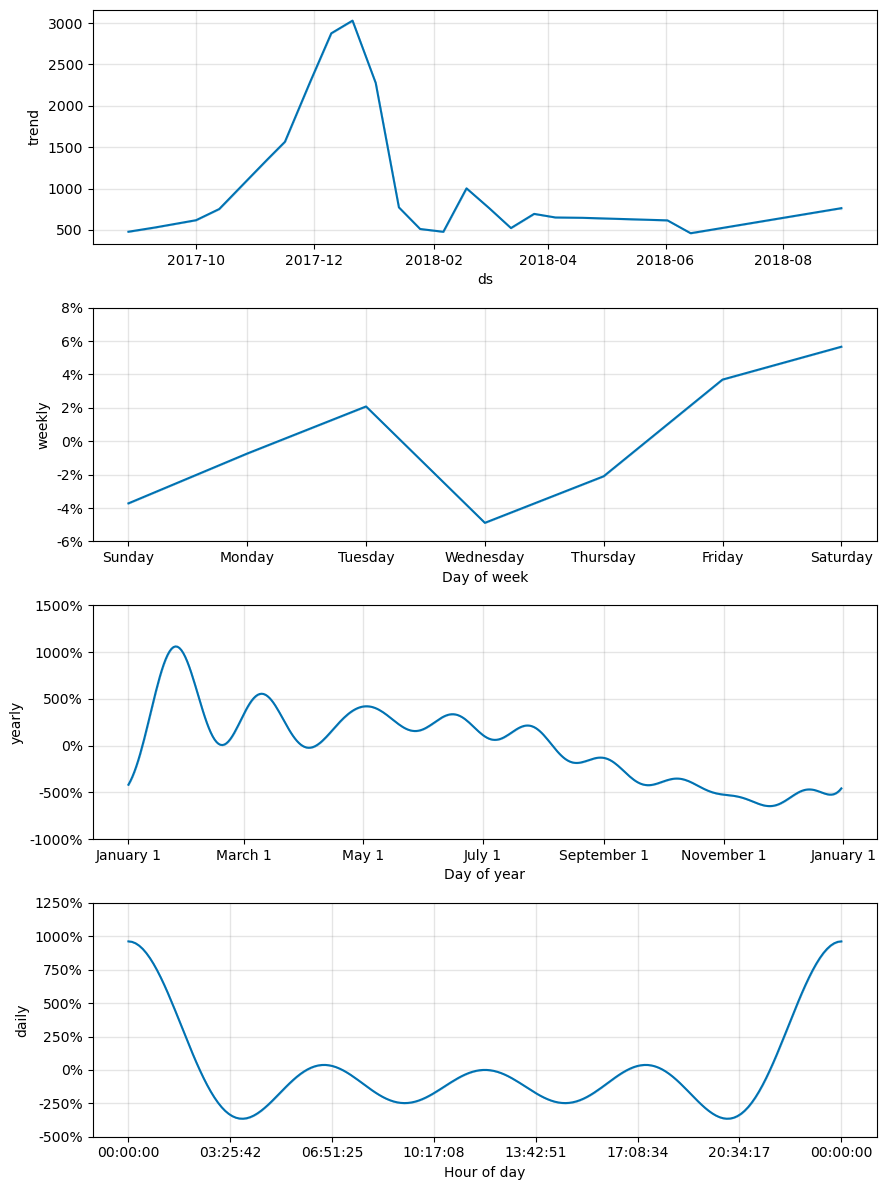

In [5]:
fig2 = prophet.plot_components(forecast_data)